# Data visualization and statistics using Pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using  Pima Indians Diabetes Database as a csv file. 
This data-set is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.

In [4]:
df = pd.read_csv("pima-indians-diabetes.csv")
print(df.head())

   pregs  plas  pres  skin  test   BMI   pedi  Age  class
0      6   148    72    35     0  33.6  0.627   50      1
1      1    85    66    29     0  26.6  0.351   31      0
2      8   183    64     0     0  23.3  0.672   32      1
3      1    89    66    23    94  28.1  0.167   21      0
4      0   137    40    35   168  43.1  2.288   33      1


In [7]:
data = df.drop(['class'], axis = 1)
data.head()

,pregs,plas,pres,skin,test,BMI,pedi,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Mean, median, mode, minimum, maximum and standard deviation for all the attributes

In [10]:
data.describe()

,pregs,plas,pres,skin,test,BMI,pedi,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Scatter plot between 'Age' and each of the other attributes, excluding 'class'

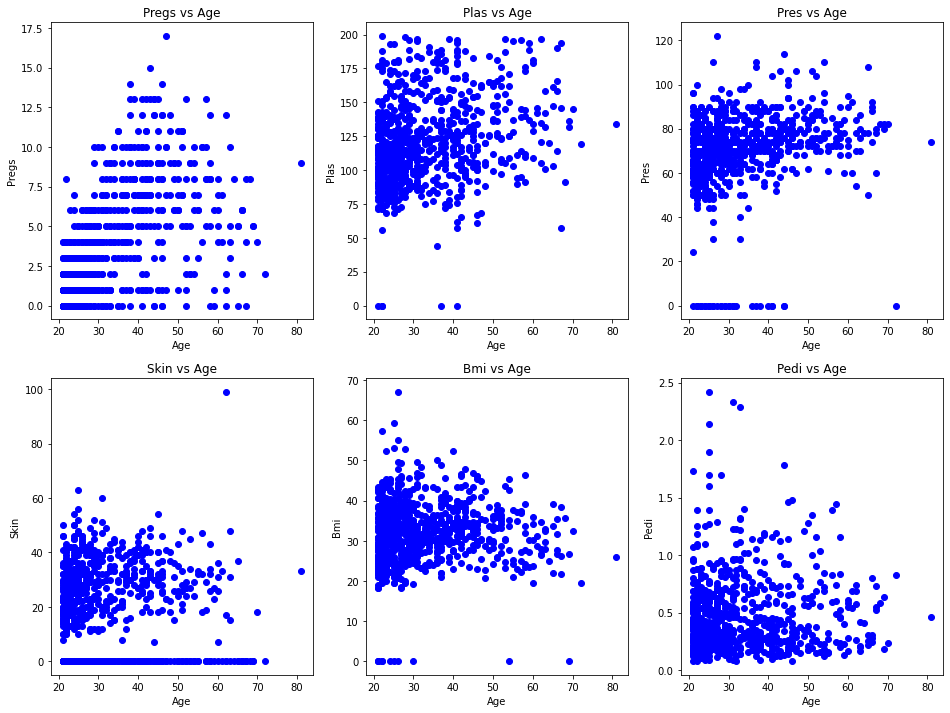

In [11]:
attributesfr = ['pregs', 'plas', 'pres', 'skin','BMI', 'pedi']#ASSIGNING OUR ATTRIBUTES IN A LIST 
fig,axs=plt.subplots(2,3,figsize=(16,12))  #PLOTTING  SUBPLOTS FOR OUR REQUIRED ATTRIBUTE
a=0;b=0
for i in attributesfr: #LOOP IN ATTRIBUTES1 FOR OBTAINING EACH AND EVERY ATTRIBUTES FROM THE LIST
   
    axs[a][b].set_title(i.capitalize()+' vs Age')
    axs[a][b].scatter(data['Age'],data[i],color='blue') #USING SCATTER PLOT FROM PANDAS LIBRARY
    axs[a][b].set_xlabel('Age')
    axs[a][b].set_ylabel(i.capitalize())
    b+=1
    if b==3:
        a+=1;b=0
    
plt.show()

The value of correlation coefficient of ‘Age’ with all other attributes

In [12]:
for i in attributesfr: 
     corr_age = np.corrcoef(data['Age'],data[i]) 
     print("correlation coefficient between Age and ",i,": %1.2f"%(corr_age[0,1]))

correlation coefficient between Age and  pregs : 0.54
correlation coefficient between Age and  plas : 0.26
correlation coefficient between Age and  pres : 0.24
correlation coefficient between Age and  skin : -0.11
correlation coefficient between Age and  BMI : 0.04
correlation coefficient between Age and  pedi : 0.03


 The histogram for the attributes ‘preg’ and ‘skin’ 

[[<matplotlib.axes._subplots.AxesSubplot object at 0x00000161CE45F670>


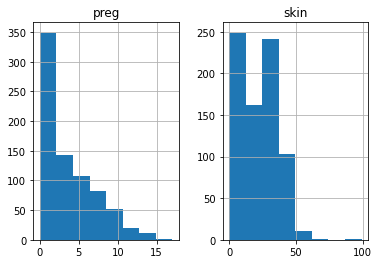

In [13]:
df2 = pd.DataFrame({'preg': data['pregs'],'skin':data['skin']})
plt2 = df2.hist(bins = 8)
print(plt2) 

The histogram of attribute ‘preg’ for each of the 2 classes individually

In [14]:
df3 = df.groupby(['pregs','class'])
print(df3.first())

             plas  pres  skin  test   BMI   pedi  Age
pregs class                                          
0     0       100    88    60   110  46.8  0.962   31
      1       137    40    35   168  43.1  2.288   33
1     0        85    66    29     0  26.6  0.351   31
      1       189    60    23   846  30.1  0.398   59
2     0        71    70    27     0  28.0  0.586   22
      1       197    70    45   543  30.5  0.158   53
3     0       126    88    41   235  39.3  0.704   27
      1        78    50    32    88  31.0  0.248   26
4     0       110    92     0     0  37.6  0.191   30
      1       111    72    47   207  37.1  1.390   56
5     0       116    74     0     0  25.6  0.201   30
      1       166    72    19   175  25.8  0.587   51
6     0        92    92     0     0  19.9  0.188   28
      1       148    72    35     0  33.6  0.627   50
7     0       133    84     0     0  40.2  0.696   37
      1       100     0     0     0  30.0  0.484   32
8     0        99    84     

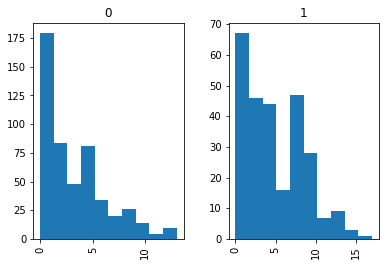

In [15]:
df['pregs'].hist(by=df['class'])
plt.show()

The boxplot for all the attribute excluding ‘class’ 

AxesSubplot(0.125,0.125;0.775x0.755)


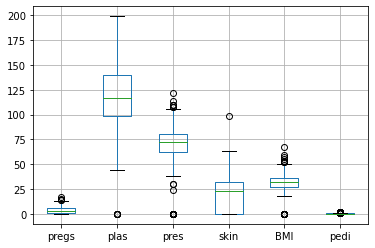

In [17]:
bxplot = data.boxplot(attributesfr)
print(bxplot)